In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
TRAIN_VAL_SPLIT = 1000
WINDOW_SIZE = 20
BATCH_SIZE = 32
SHUFFER_BUFFER_SIZE = 1000

In [3]:
from util import load_synthesized_data, build_dataset

df_train, df_val = load_synthesized_data(split=1000)
y_train = df_train['y'].values

dataset = build_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, SHUFFER_BUFFER_SIZE)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Bidirectional, LSTM, Dense

def build_model():
    model = Sequential([
        Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        Bidirectional(LSTM(32, return_sequences=True)),
        Bidirectional(LSTM(32)),
        Dense(1),
        Lambda(lambda x: x * 100.0)
    ])
    return model

In [5]:
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from util import clear_env

clear_env()

model = build_model()
model.compile(loss=Huber(), optimizer=SGD(lr=1e-8, momentum=0.9))

def learning_rate(epoch):
    return 1e-8 * 10**(epoch / 20)

lr_schedule = LearningRateScheduler(learning_rate)

history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=0)

W0807 21:46:43.371302  1240 deprecation.py:323] From d:\Dev\Miniconda3\envs\tf2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[1e-08, 0.0001, 0, 30]

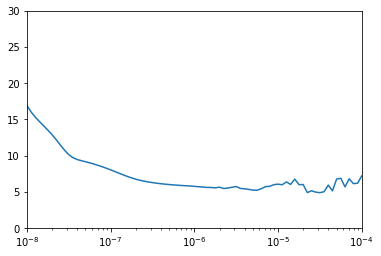

In [6]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

Select learning rate = 1e-5.

In [7]:
clear_env()

model = build_model()
model.compile(loss=Huber(), optimizer=SGD(lr=1e-5, momentum=0.9), metrics=['mae'])

history = model.fit(dataset, epochs=100, verbose=0)

MSE: 61.42637685947687, MAE: 5.559552547802639


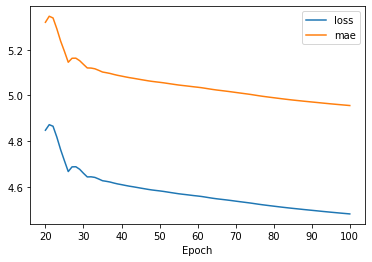

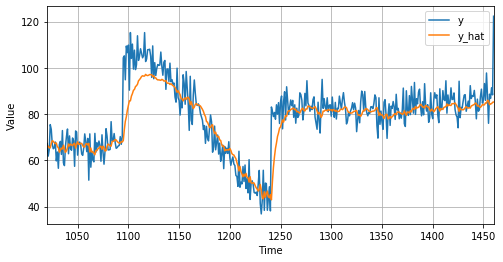

In [8]:
from util import plot_history, validate_model

plot_history(history, start_epoch=20, metrics=['loss', 'mae'])
validate_model(model, df_val, WINDOW_SIZE)

In [9]:
clear_env()

model = build_model()
model.compile(loss=Huber(), optimizer=SGD(lr=1e-6, momentum=0.9), metrics=['mae'])

history = model.fit(dataset, epochs=100, verbose=0)

MSE: 72.91099116656495, MAE: 5.99703265583175


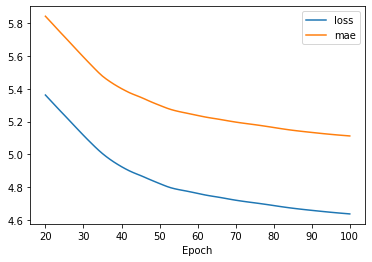

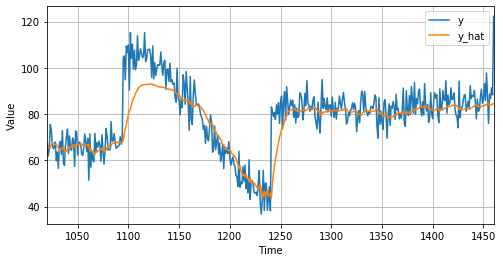

In [10]:
plot_history(history, start_epoch=20, metrics=['loss', 'mae'])
validate_model(model, df_val, WINDOW_SIZE)

In [11]:
clear_env()

model = Sequential([
  Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
  Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  Bidirectional(tf.keras.layers.LSTM(32)),
  Dense(1),
  Lambda(lambda x: x * 100.0)
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9), metrics=['mae'])
history = model.fit(dataset, epochs=100, verbose=0)

MSE: 55.20085191163875, MAE: 5.4317241768612785


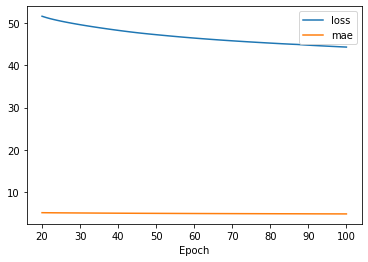

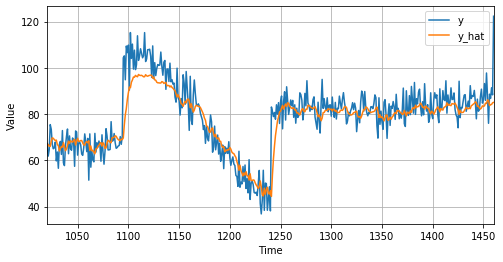

In [12]:
plot_history(history, start_epoch=20, metrics=['loss', 'mae'])
validate_model(model, df_val, WINDOW_SIZE)